In [1]:
# Audio Analysis

In [61]:
from __future__ import division

%matplotlib inline
import os
import subprocess
import numpy as np
import scipy
#import librosa
import matplotlib.pyplot as plt

import pandas as pd
import datetime as dt
import imageio

import sklearn
from sklearn.preprocessing import scale
import seaborn as sns
from scipy import stats

import mycharite
import mystats

In [62]:
df, df_audio, action_r, action_c, gaze, audio =mycharite.load('charite')
df_audio['asc']=(df_audio.asd==11)*1

In [63]:
df_audio=df_audio.rename(columns={'0' : 'spectrum_0', '1': 'spectrum_1', '2': 'spectrum_2', 
                      '3' : 'spectrum_3', '4': 'spectrum_4', '5': 'spectrum_5',
                      '6' : 'spectrum_6', '7': 'spectrum_7', '8': 'spectrum_8',
                      '9' : 'spectrum_9', '10': 'spectrum_10', '11': 'spectrum_11',
                      '12' : 'spectrum_12', '13': 'spectrum_13', '14': 'spectrum_14',
                      '15' : 'spectrum_15', '16': 'spectrum_16', '17': 'spectrum_17',
                      '18' : 'spectrum_18', '19': 'spectrum_19', '20': 'spectrum_20',
                      '21' : 'spectrum_21', '22': 'spectrum_22', '23': 'spectrum_23',
                      '24': 'spectrum_24', '25' : 'spectrum_25', '26': 'spectrum_26', 
                      '27': 'spectrum_27', '28' : 'spectrum_28', '29': 'spectrum_29',
                      '30': 'spectrum_30', '31' : 'spectrum_31', '32': 'spectrum_32', 
                      '33': 'spectrum_33',  '34' : 'spectrum_34', '35': 'spectrum_35',
                      '36': 'spectrum_36',  '37' : 'spectrum_37', '38': 'spectrum_38', 
                      '39': 'spectrum_39'                          
          })

In [64]:
df_audio.columns
df_audio=df_audio.rename(columns={'disgust_proband': 'disgust_participant', 
                      'neutral_proband' : 'neutral_participant', 
                          'joy_proband': 'joy_participant'
                      })

df_audio=mycharite.adapt_times(df_audio)

In [65]:
df_audio['participant_speaks']=(df_audio.conversation=='joy_participant') | (df_audio.conversation=='disgust_participant') | (df_audio.conversation=='neutral_participant')#if conversation==
print (len(df_audio))
df_audio=df_audio[(df_audio.participant_speaks==True)&(df_audio.conversation!='intro')].reset_index(drop=True)
print (len(df_audio))

1326854
284054


In [67]:
#for i in var:
#    print (i)
#    print (df_audio.groupby('vpn').mean().groupby(['asc'])[i].describe())
    
print ('HNR')
print (df_audio.groupby('vpn').median().groupby(['asc', 'sex_x'])['HNR'].describe())
    
    
var=['pitch','meanF0Hz', 'stdevF0Hz', 
       'localJitter', 'localShimmer']


for i in var:
    print (i)
    print (df_audio.groupby('vpn').mean().groupby(['asc', 'sex_x'])[i].describe())

HNR
           count       mean       std       min        25%        50%  \
asc sex_x                                                               
0   1.0     22.0  10.323388  1.471678  7.300449   9.183981  10.604793   
    2.0     21.0   6.907820  2.122374 -0.847675   6.397270   7.336074   
1   1.0     17.0  10.836088  1.424675  8.447267  10.220963  10.496430   
    2.0     19.0   8.500284  1.435019  6.569379   7.674755   8.138523   

                 75%        max  
asc sex_x                        
0   1.0    11.265395  13.369221  
    2.0     7.995485   9.526844  
1   1.0    11.650211  13.818102  
    2.0     9.333755  12.213301  
pitch
           count      mean       std       min       25%       50%       75%  \
asc sex_x                                                                      
0   1.0     22.0  0.009581  0.003409  0.003926  0.006562  0.010062  0.011842   
    2.0     21.0  0.010368  0.005880  0.001921  0.006145  0.009354  0.013046   
1   1.0     17.0  0.009259 

In [69]:
df_audio.groupby('vpn').median()[var]

,pitch,meanF0Hz,stdevF0Hz,localJitter,localShimmer
vpn,,,,,
2,0.000827,113.658914,20.556304,0.031740,0.172654
3,0.000657,141.212826,27.501690,0.035234,0.183871
4,0.000729,211.996777,58.111738,0.027128,0.143857
5,0.001748,147.443444,39.088021,0.028361,0.170044
6,0.001061,149.997590,45.637157,0.033745,0.167463
7,0.000528,249.191539,69.301082,0.032657,0.168394
8,0.000609,163.972600,37.340008,0.029248,0.162401
9,0.000533,163.888760,54.986475,0.043453,0.188936
10,0.000775,216.120579,51.106781,0.026328,0.153562


In [55]:
def spectrogram_one(df_audio):
    data=np.array(df_audio.groupby('timestamp').mean()[audio].T)
    ax = sns.heatmap(data)
    plt.show()
    
def spectrogram(df_audio, name):
    plt.close()
    data=(df_audio.groupby('asc').mean()[audio[3:14]].T)
    #mfccs = sklearn.preprocessing.scale(data, axis=0)
    print (data)
    ax = sns.heatmap(np.array(data)) #, vmin=-2, vmax=2)
    plt.savefig('Heatmap' + name +'.png')
    plt.show()

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


In [ ]:
var=['pitch','meanF0Hz', 'stdevF0Hz', 'HNR',
       'localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter',
       'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer',
       'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'JitterPCA', 'ShimmerPCA']

#PITCH IS ENERGY

formula = 'HNR ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').median()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)


formula = 'meanF0Hz ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').mean()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)


formula = 'stdevF0Hz ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').mean()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

formula = 'localabsoluteJitter ~ C(sex_x) + C(asc)'
model = ols(formula, df_audio.groupby('vpn').mean()).fit()
aov_table = anova_lm(model, typ=2)
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

In [29]:
#df_audio['sex']=df_audio.sex_x

pitch


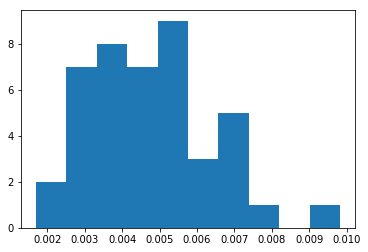

meanF0Hz


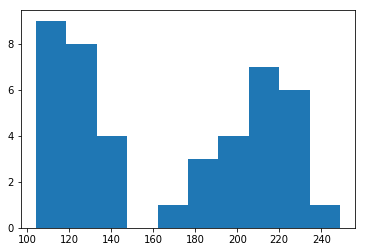

stdevF0Hz


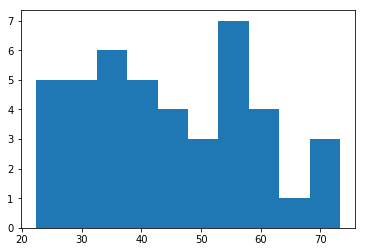

HNR


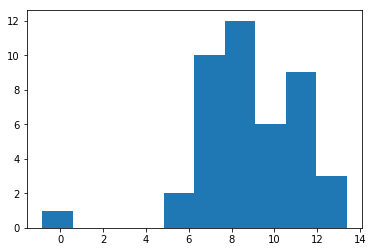

localJitter


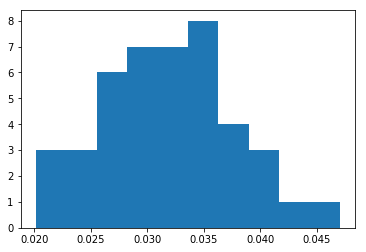

localabsoluteJitter


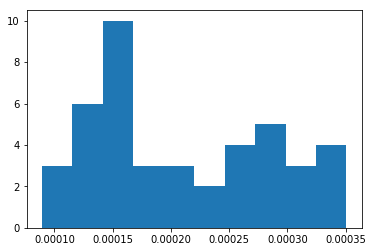

rapJitter


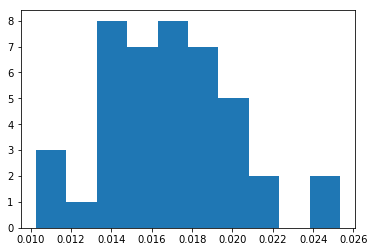

ppq5Jitter


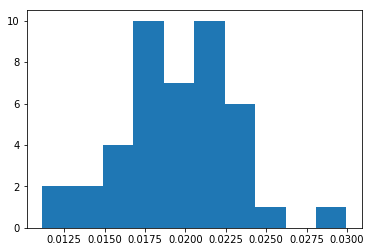

ddpJitter


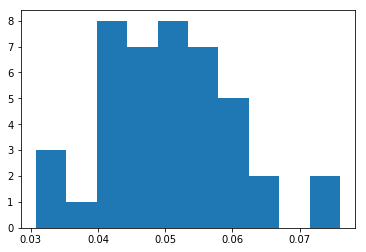

localShimmer


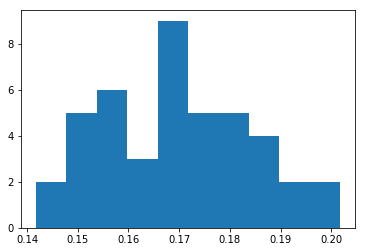

localdbShimmer


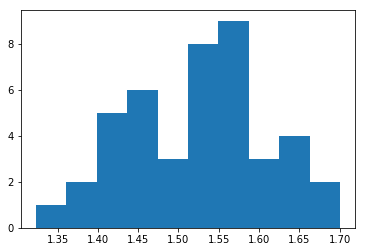

apq3Shimmer


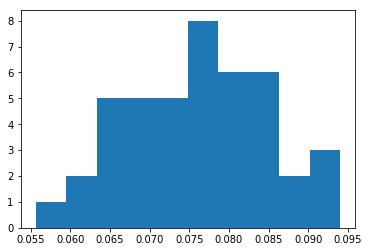

apq5Shimmer


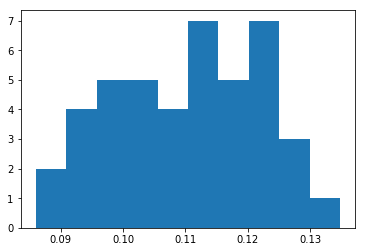

apq11Shimmer


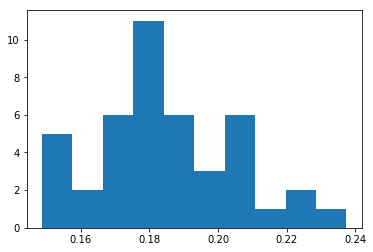

ddaShimmer


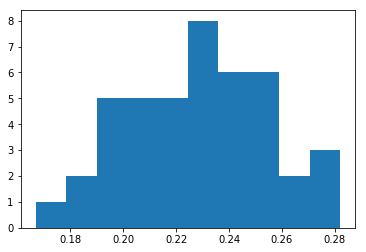

JitterPCA


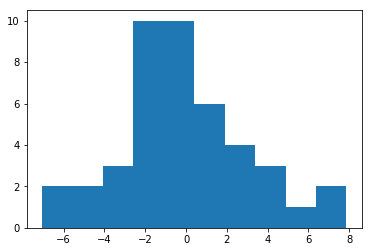

ShimmerPCA


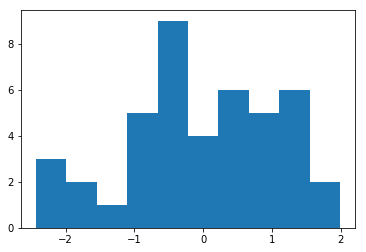

spectrum_0


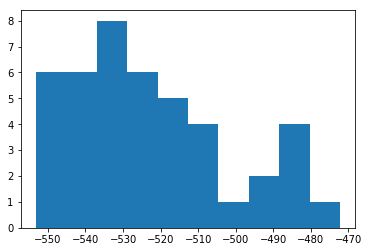

spectrum_1


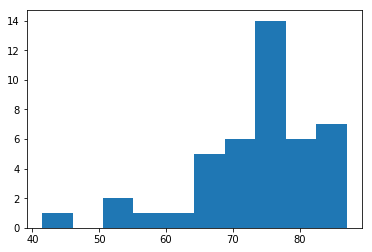

spectrum_2


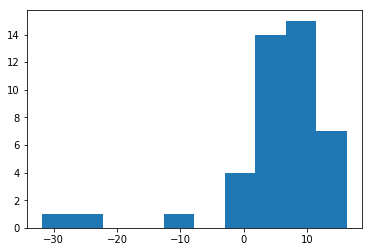

spectrum_4


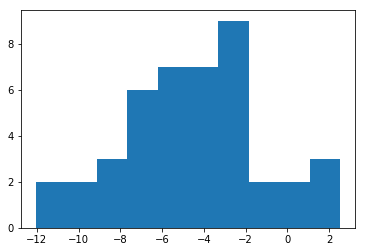

spectrum_3


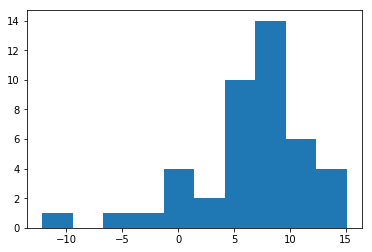

spectrum_5


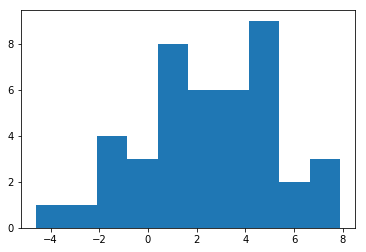

spectrum_6


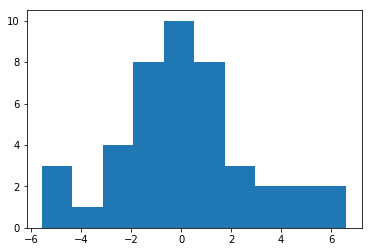

spectrum_7


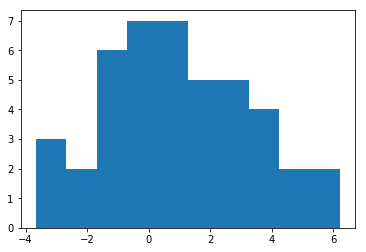

spectrum_8


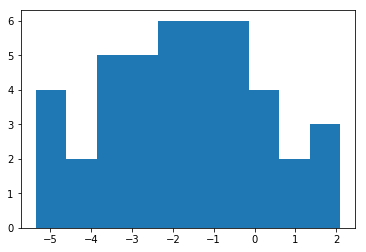

spectrum_9


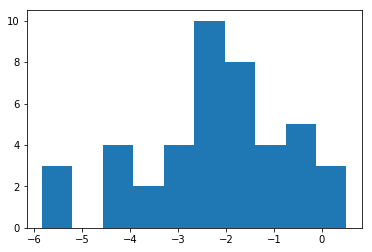

spectrum_10


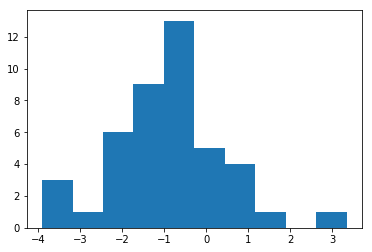

spectrum_11


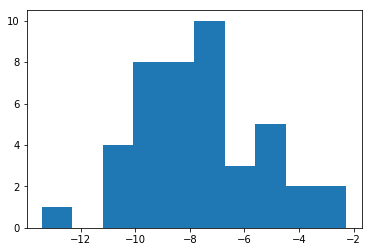

spectrum_12


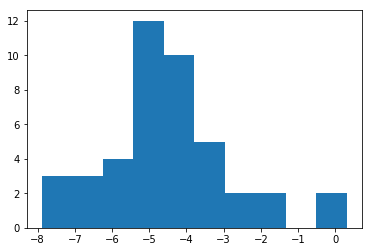

spectrum_13


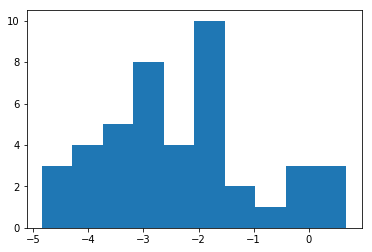

spectrum_14


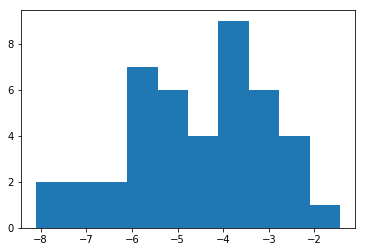

spectrum_15


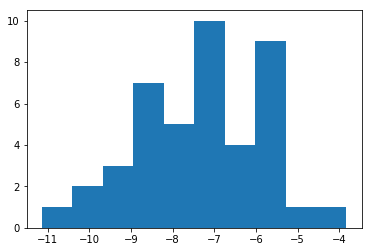

spectrum_16


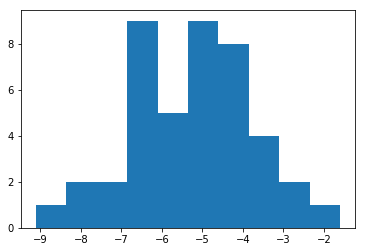

spectrum_17


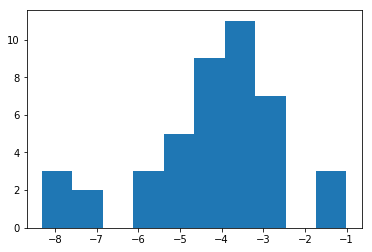

spectrum_18


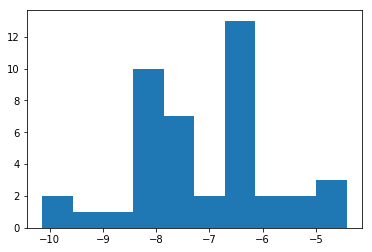

spectrum_19


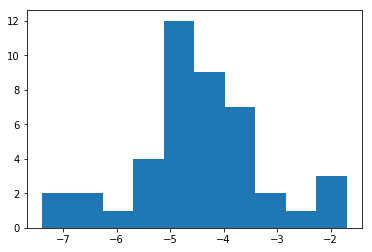

spectrum_20


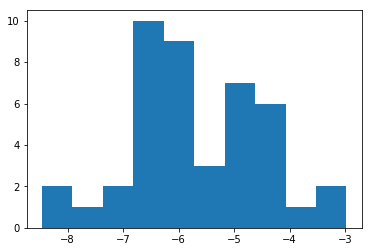

spectrum_21


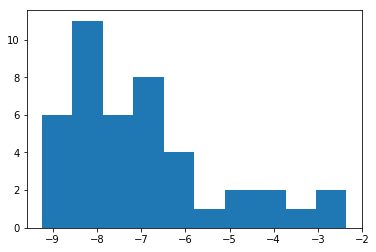

spectrum_22


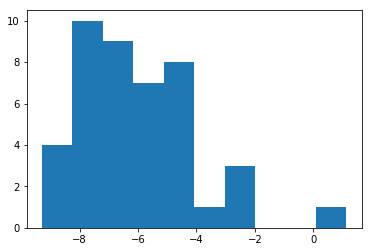

spectrum_23


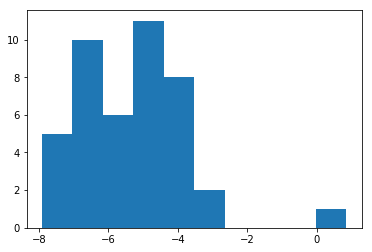

spectrum_24


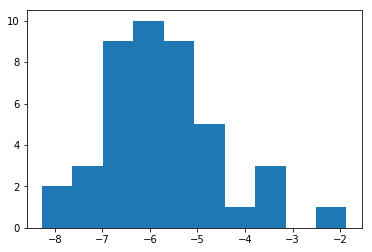

spectrum_25


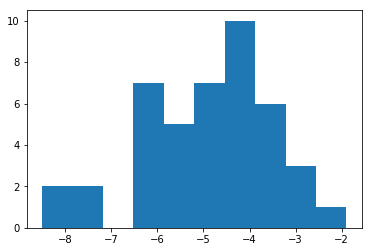

spectrum_26


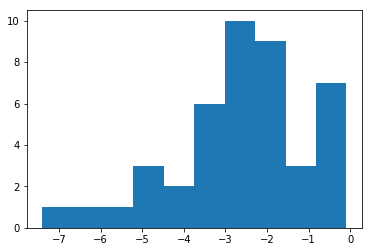

spectrum_27


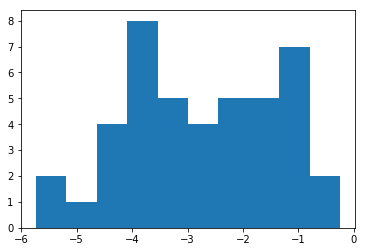

spectrum_28


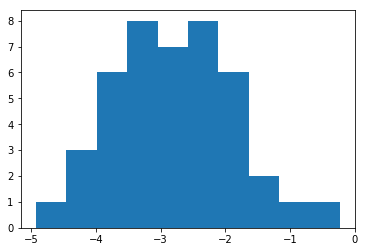

spectrum_29


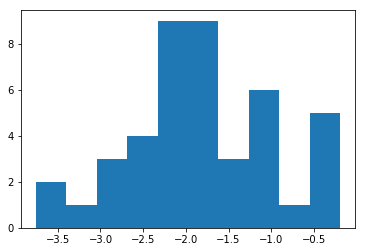

spectrum_30


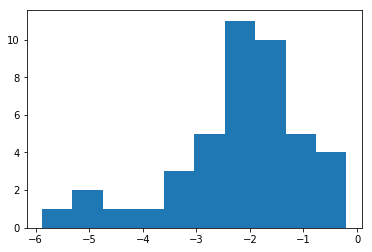

spectrum_31


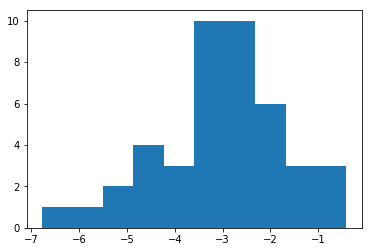

spectrum_32


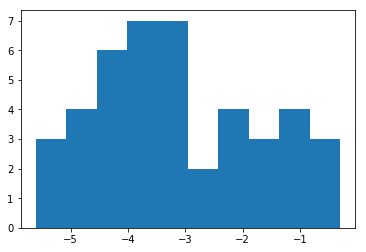

spectrum_33


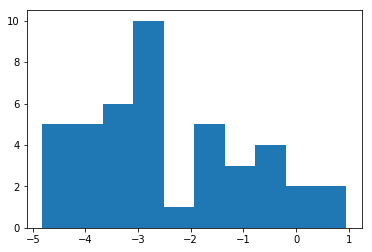

spectrum_34


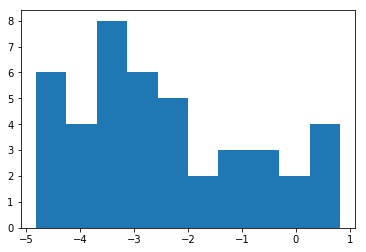

spectrum_35


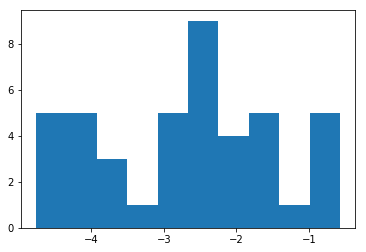

spectrum_36


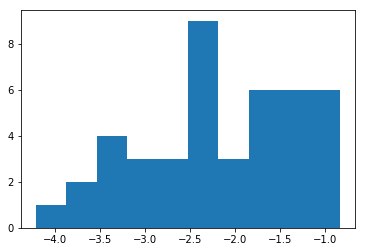

spectrum_37


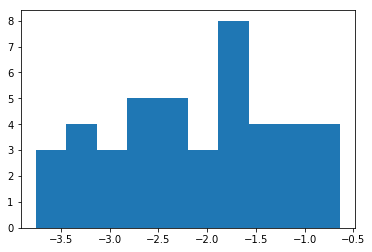

spectrum_38


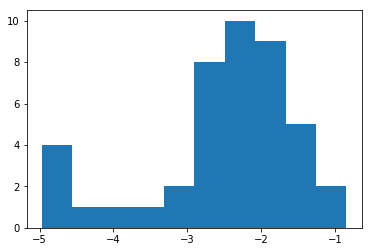

spectrum_39


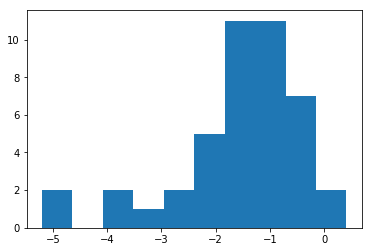

In [8]:
a=0
for i in audio:
    print (i)
    plt.hist(((df_audio[df_audio.asc==0].groupby('vpn').mean()[i])))
    plt.show()


In [9]:
y, sr = librosa.load(audio_file, sr=None) // sr is none so librosa can sample the audion using the convenient sr
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=13, hop_length=int(0.010sr), n_fft=int(0.025sr))
-To set the width of window to 25 ms you have tu multiply the sr and 0.025.The reason behind that is that sr is the number of samples in one second. so to get the number of samples in 25ms you have to multiply by 0.025.
-same thing for the stride, to get a stride of 10 ms, you need to multiply the sr and 0.010.

SyntaxError: invalid syntax (<ipython-input-9-de9f99a3dcc2>, line 1)

In [ ]:
# Graphs for audio

time = [i*rate for i in range(1,rmse.shape[1]+1)] #get corresponding time values for frames
plt.figure(1)
plt.plot(time, rmse[0])
plt.show()


y, sr = librosa.load(conv_path)
S=librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(librosa.power_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

zcrs = librosa.feature.zero_crossing_rate(data)
plt.figure(2)
plt.plot(time, zcrs[0])
plt.show()